# PCA-Transformation

Die Hauptkomponentenanalyse (PCA) ist eine Technik zur Dimensionsreduktion, die die Kovarianzmatrix der Daten verwendet. Die Schritte zur Durchführung einer PCA-Transformation sind wie folgt:

1. Zentriere die Daten:
   $$ X_{\text{zentriert}} = X - \mu $$

   wobei ($\mu$) der Mittelwert jeder Variablen ist.

2. Berechne die Kovarianzmatrix:
   $$ \Sigma = \frac{1}{n-1} X_{\text{zentriert}}^T X_{\text{zentriert}} $$



3. Führe die Eigenwertzerlegung der Kovarianzmatrix durch:
   $$ \Sigma v = \lambda v $$

   wobei  ($\lambda$)  die Eigenwerte und ($v$) die Eigenvektoren sind.

4. Sortiere die Eigenvektoren nach den Eigenwerten in absteigender Reihenfolge und wähle die ($k$) größten Eigenvektoren aus, um die Transformationsmatrix ($W$) zu bilden.

5. Transformiere die Daten in den neuen Raum:
   $$ X_{\text{PCA}} = X_{\text{zentriert}} W $$

   wobei ($W$) die Matrix der ausgewählten Eigenvektoren ist.


Zusammengefasst ist die PCA-Transformation:
   $$ X_{\text{PCA}} = (X - \mu) W $$

### Part I
Datenkompression 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
# YALE-Face-Datenbank laden (hier verwenden wir Olivetti Faces als Beispiel)
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = dataset.data
n_samples, n_features = faces.shape
faces, n_samples, n_features, dataset
#labels = dataset.target  # Assuming you want to color by labels
dataset.data.shape

(400, 4096)

In [49]:
original_size = faces.nbytes / (1024 ** 2)  # Größe in Megabyte
original_size

6.25

### Datensatz
enthält 400 Samples, 4096 Dimensionen ($64^2$ Pixelwerte)

Überlegung: Datenkompression durch Dimesnionsreduktion

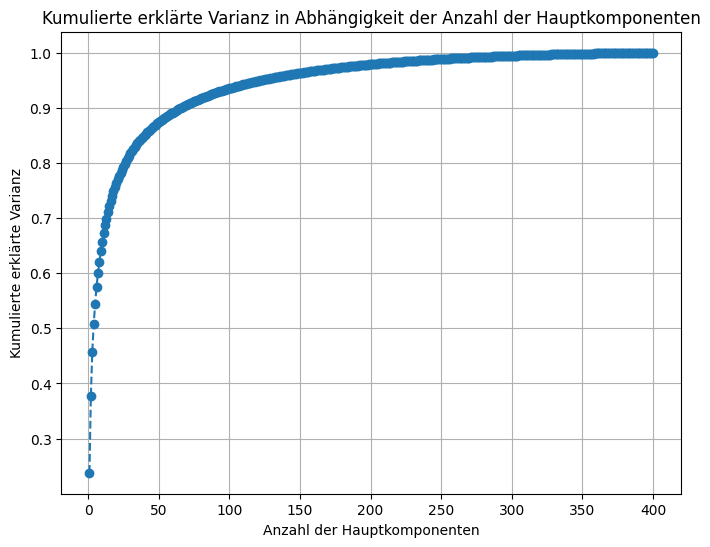

In [35]:
# PCA ohne Angabe der Anzahl der Komponenten
pca = PCA()
pca.fit(faces)

# Kumulierte erklärte Varianz plotten
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz in Abhängigkeit der Anzahl der Hauptkomponenten')
plt.grid(True)
plt.show()

Die Anzahl der Hauptkomponenten, die 95% der Varianz erklären, ist: 123


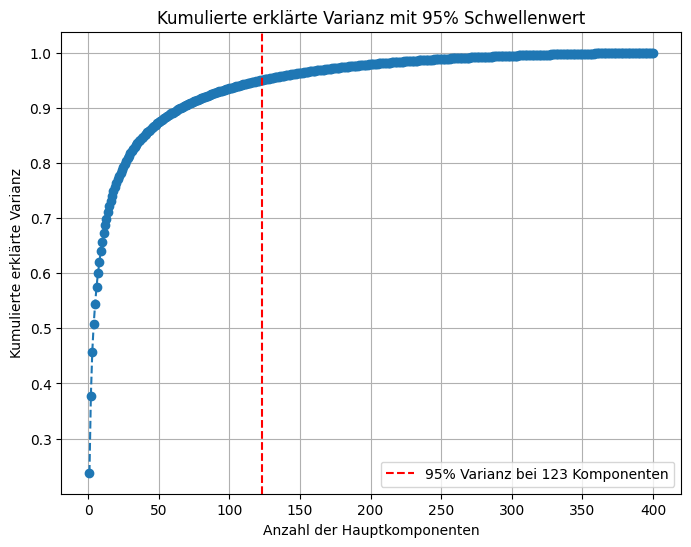

In [37]:
# Erklärte Varianz und kumulierte erklärte Varianz berechnen
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Anzahl der Komponenten für 95% der Varianz
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Die Anzahl der Hauptkomponenten, die 95% der Varianz erklären, ist: {num_components}')

# Plot mit dem identifizierten Punkt für 95% der Varianz
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'95% Varianz bei {num_components} Komponenten')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz mit 95% Schwellenwert')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# PCA auf Bildermatrix anwenden
n_components = 123  # Anzahl der Hauptkomponenten
pca = PCA(n_components=n_components, whiten=True)
faces_pca = pca.fit_transform(faces)
compressed_size = (faces_pca.nbytes + pca.components_.nbytes) / (1024 ** 2)  # Größe in Megabyte
compressed_size

2.10955810546875

In [52]:
# Ein Bild komprimieren und rekonstruieren
face_idx = 0  # Index des zu komprimierenden Bildes
original_face = faces[face_idx]
compressed_face = pca.inverse_transform(faces_pca[face_idx].reshape(1, -1)).reshape(-1)

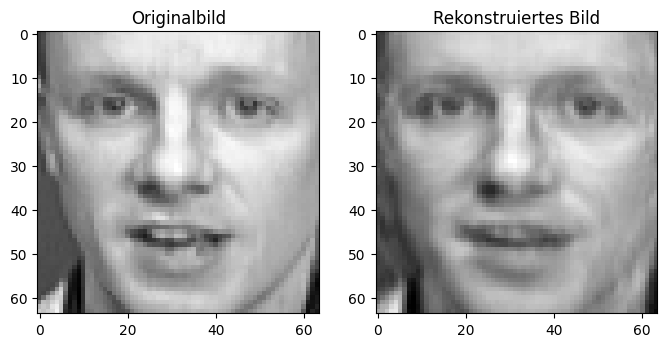

Original shape: (4096,)
Compressed shape: (4096,)


In [53]:
# Original und rekonstruierte Bilder anzeigen
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(original_face.reshape((64, 64)), cmap='gray')
ax[0].set_title('Originalbild')

ax[1].imshow(compressed_face.reshape((64, 64)), cmap='gray')
ax[1].set_title('Rekonstruiertes Bild')

plt.show()

# Überprüfe die Dimensionen
print("Original shape:", original_face.shape)
print("Compressed shape:", compressed_face.shape)

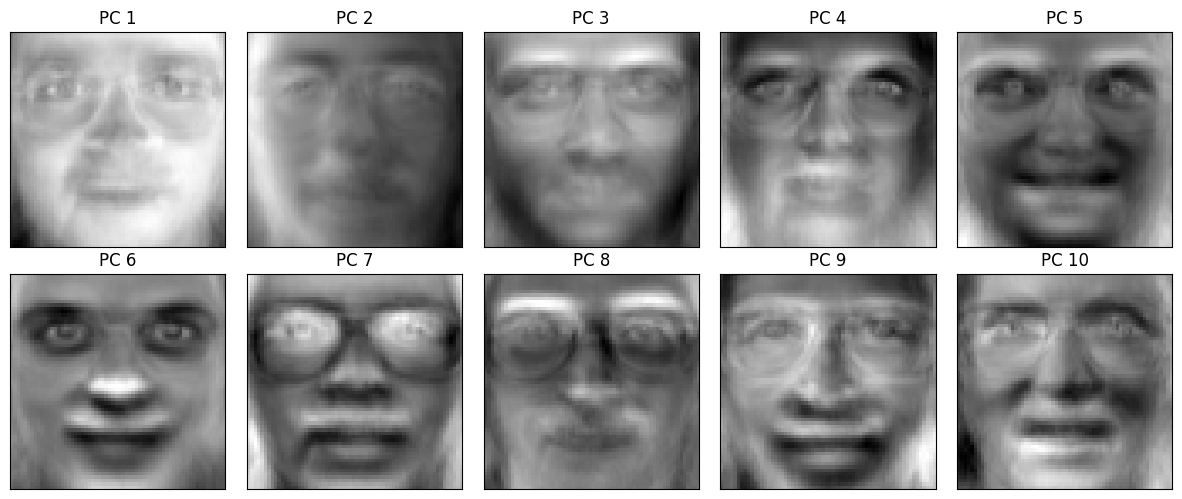

In [6]:
# Einige der Hauptkomponenten visualisieren
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'PC {i+1}')

plt.show()


In [42]:
# # Plot the PCA-transformed data
# plt.figure(figsize=(12, 6))

# # Subplot for original data points in the PCA space
# plt.subplot(1, 2, 1)
# plt.scatter(faces_pca[:, 0], faces_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
# plt.title('Original Data Points Projected on First Two Principal Components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Label')

# # Plot the explained variance
# explained_variance = pca.explained_variance_ratio_
# plt.subplot(1, 2, 2)
# plt.bar(range(1, 3), explained_variance * 100, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1, 3), np.cumsum(explained_variance) * 100, where='mid', label='cumulative explained variance')
# plt.ylabel('Explained variance percentage')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.title('Explained Variance by Principal Components')

# plt.tight_layout()
# plt.show()

### Part II

In [45]:
# YALE-Face-Datenbank laden (hier verwenden wir Olivetti Faces als Beispiel)
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = dataset.data
labels = dataset.target
n_samples, n_features = faces.shape

In [30]:
# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.3, random_state=42)

In [44]:
# PCA auf die Trainingsdaten anwenden
n_components = 123  # Anzahl der Hauptkomponenten
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
# Klassifikation im Hauptachsenraum
def classify_face(face_pca, X_train_pca, y_train):
    distances = np.linalg.norm(X_train_pca - face_pca, axis=1)
    return y_train[np.argmin(distances)]

In [29]:
# Vorhersagen für die Testdaten treffen
y_pred = [classify_face(face, X_train_pca, y_train) for face in X_test_pca]

NameError: name 'X_test_pca' is not defined

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit der Gesichtserkennung: {accuracy:.2f}')

Genauigkeit der Gesichtserkennung: 0.72


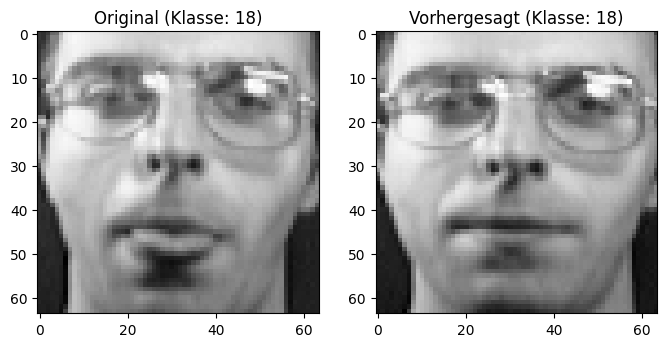

In [58]:
# Ein Testbild und das zugehörige Originalbild anzeigen
test_idx = 0  # Index des Testbildes
test_face = X_test[test_idx]
predicted_label = classify_face(X_test_pca[test_idx], X_train_pca, y_train)
true_label = y_test[test_idx]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(test_face.reshape((64, 64)), cmap='gray')
ax[0].set_title(f'Original (Klasse: {true_label})')

# Ein Trainingsbild aus der vorhergesagten Klasse anzeigen
predicted_face = X_train[y_train == predicted_label][0]

ax[1].imshow(predicted_face.reshape((64, 64)), cmap='gray')
ax[1].set_title(f'Vorhergesagt (Klasse: {predicted_label})')

plt.show()

C:\Users\domin\AppData\Local\Temp\ipykernel_21180\1372642993.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_clusters, cmap='plasma', marker='x', edgecolor='k', s=40, label='Testdaten')


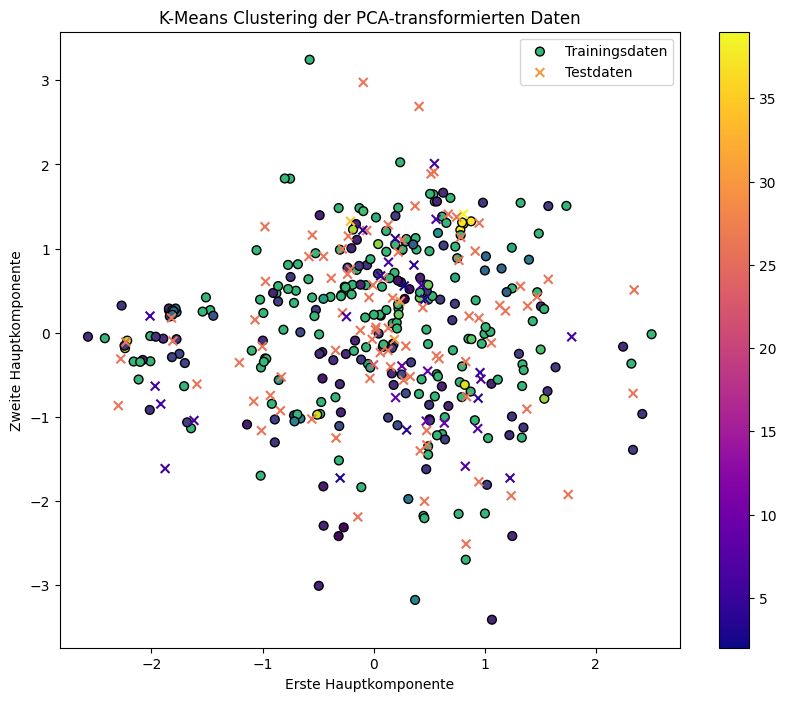

In [59]:
from sklearn.cluster import KMeans

# Anzahl der Cluster festlegen (entspricht der Anzahl der Klassen in den Daten)
n_clusters = len(np.unique(labels))

# K-Means Clustering auf den PCA-transformierten Daten anwenden
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_pca)

# Cluster-Zugehörigkeiten der Trainingsdaten und Testdaten
train_clusters = kmeans.predict(X_train_pca)
test_clusters = kmeans.predict(X_test_pca)

# Visualisierung der Cluster im PCA-Raum
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_clusters, cmap='viridis', marker='o', edgecolor='k', s=40, label='Trainingsdaten')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_clusters, cmap='plasma', marker='x', edgecolor='k', s=40, label='Testdaten')
plt.xlabel('Erste Hauptkomponente')
plt.ylabel('Zweite Hauptkomponente')
plt.title('K-Means Clustering der PCA-transformierten Daten')
plt.legend()
plt.colorbar()
plt.show()
